<a href="https://colab.research.google.com/github/harishahamed26/Image-Recognition-Cat-Dog/blob/main/ImageClassificiationAnimals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Recoginzation

In [16]:
# Importing of necessary libraries

from numpy import matrix
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
import os
from skimage.feature import hog
from sklearn                import tree


# defining the constant dimension 

Const_Dim = (200, 200)
RANDOM_SEED = 100

In [17]:
# Loading of data set

df_train_CSV = pd.read_csv('https://raw.githubusercontent.com/harishahamed26/Image-Recognition-Cat-Dog/main/train.csv')


print('Printing 5 rows of the train dataset ')
print('\n')
print(df_train_CSV.head(5))


Printing 5 rows of the train dataset 


   id label
0   1   cat
1   2   dog
2   3   cat
3   4   cat
4   5   cat


In [18]:
# Importing of warnings package to ignore unncessary warnings
import warnings
warnings.filterwarnings('ignore')

# Definition of function for plotting
def plotGraph(data):
  sns.countplot(data)
  plt.title('Count plot')
  plt.show()


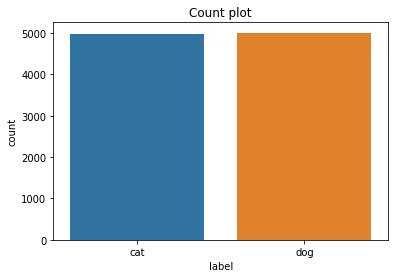

In [19]:
# Plotting of count plot for the train dataset
plotGraph(df_train_CSV['label'] )

In [20]:
#Definition of function to Load the image dataset 
from google.colab.patches import cv2_imshow
import os
def LoadImage(ids, dataset_name , dim):

  images = []
  for id in ids:
    img_name =  f'{id}.jpg'
    url = f"curl -o {img_name} https://raw.githubusercontent.com/harishahamed26/Image-Recognition-Cat-Dog/main/{dataset_name}/{img_name}"
    os.system(url)
    img = cv2.imread(img_name)
    if img.shape[0] != dim[1] or img.shape[1] != dim[0]:
      img = cv2.resize(img, dim)
    images.append(img)
  return images


In [ ]:
# Loading of train images

train_images = LoadImage(df_train_CSV['id'], 'train_images', Const_Dim)
print(f'Number of training images loaded: {len(train_images)}')


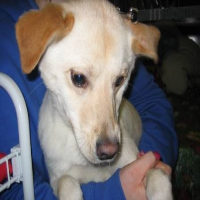

In [ ]:
# Displaying a sample of train image 

cv2_imshow(train_images[1])

## Pre-processing & Image Manipulation 



In [ ]:
'''
Defining the function to plot confusion matrix, Accuracy and 
Classification Report
'''

# Function to show the Classification Report 
def ClassificationAndAccuracyReport(ACC, CR):
  print("Classification Report")
  print("\n")
  print(CR)
  print("\n")
  print("Model Accuracy")
  print("\n")
  print(ACC)


# Functio to plot the Confusion matrix

def plot_confusion_matrix(value):
  print("\n")
  
  plt.figure(figsize= (8,8))
  sns.heatmap(value , annot = True, cmap= 'rocket_r')
  plt.title('Confusion Matrix')
  plt.show()



# Function to Check the accuracy score and print classification report
def ReportAndScore(actuals, predictions):
  Accuracy        = accuracy_score(actuals, predictions)
  ConfusionMatrix = confusion_matrix(actuals, predictions)
  return Accuracy, ConfusionMatrix


In [ ]:
# Definition of SVM algorithm
def SVM_Algoritham(X_train, X_test, Y_train, Y_test):
  SVM_model = svm.SVC()
  SVM_model.fit(X_train, Y_train)

  # making predictions on the testing set 
  Y_predict = SVM_model.predict(X_test)

  ACC, CM =ReportAndScore(Y_test, Y_predict)
  plot_confusion_matrix(CM)

  CR      = classification_report(Y_test, Y_predict)
  ClassificationAndAccuracyReport(ACC, CR)
  


In [ ]:
# Definition of Decision Tree classificaiton Algorithm

def DT_Algoritham(X_train, X_test, Y_train, Y_test):
  # build model
  clf = tree.DecisionTreeClassifier(random_state=RANDOM_SEED)
  clf.fit(X_train, Y_train)

  # Make predictions on test data
  Y_pred = clf.predict(X_test)

  # evalution
   
  ACC, CM =ReportAndScore(Y_test, Y_pred)
  plot_confusion_matrix(CM)

  CR      = classification_report(Y_test, Y_pred)
  ClassificationAndAccuracyReport(ACC, CR)
  


## Feature Extraction


1. Image Vectorisation
2. Canny Edge detection
3. HOG - Histogram of Oriented Gradient
4. PCA - Principle Component Analysis

### Model 1

Applying Image Vectorisation in SVM & DT Algorithm

In [ ]:

# Method to Get the feature - Image Vectorisation

def M1_Features(f_value):
  Features_List = []
  for G_img in f_value:
    Gray = cv2.cvtColor(G_img, cv2.COLOR_BGR2GRAY)
    features = G_img.flatten()
    Features_List.append(features)
  Features_List = np.array(Features_List)
  return Features_List

In [ ]:

Features_Train_M1 = M1_Features(train_images)
print(f'Shape of the Feature is {Features_Train_M1.shape}')

Shape of the Feature is (10000, 120000)


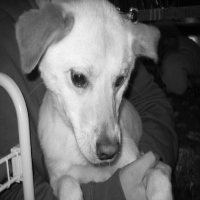

In [ ]:
cv2_imshow(GrayImage[1]) # Displaying of Gray Scaled Image 

In [ ]:
# Data split for train and validation
X_train, X_test, Y_train, Y_test = train_test_split(Features_Train_M1, df_train_CSV['label'], test_size=0.1, random_state=RANDOM_SEED)


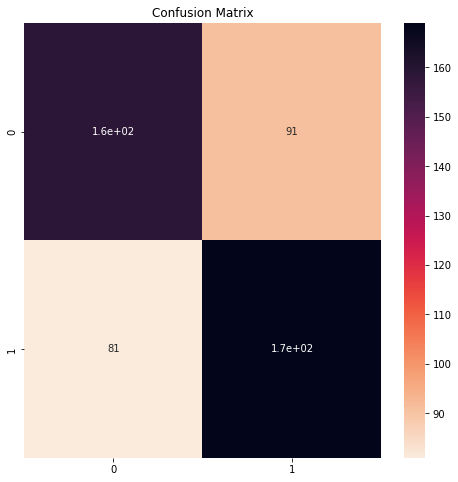

Classification Report


              precision    recall  f1-score   support

         cat       0.66      0.64      0.65       250
         dog       0.65      0.68      0.66       250

    accuracy                           0.66       500
   macro avg       0.66      0.66      0.66       500
weighted avg       0.66      0.66      0.66       500



Model Accuracy


0.656


In [ ]:
# Implementation of SVM Algorithm
m1_SVM = SVM_Algoritham(X_train, X_test, Y_train, Y_test)

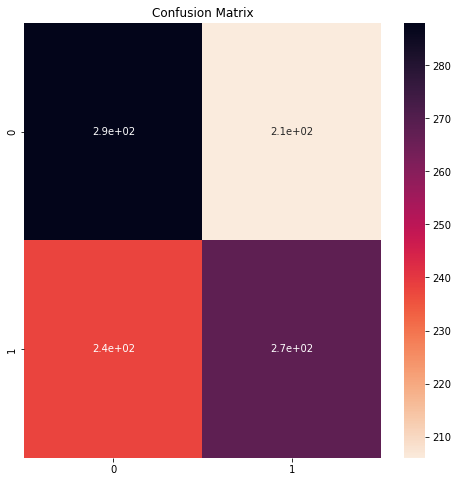

Classification Report


              precision    recall  f1-score   support

         cat       0.55      0.58      0.56       494
         dog       0.57      0.53      0.55       506

    accuracy                           0.56      1000
   macro avg       0.56      0.56      0.56      1000
weighted avg       0.56      0.56      0.56      1000



Model Accuracy


0.556


In [ ]:
# Implementation of Decision Tree Algorithm
m1_DT = DT_Algoritham(X_train, X_test, Y_train, Y_test)

### Model 2


Applying Image Vectorisation & Canny Edge Detection in SVM & DT Algorithm


In [ ]:
# Canny Edge Detection

def M2_Features(images):
  features_list = []
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # feature extraction
    edges_canny = cv2.Canny(img_grayscaled, 100, 200) 
    features = edges_canny.flatten()

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

In [ ]:
Features_Train_M2 = M2_Features(train_images)
print(Features_Train_M2.shape)

(10000, 40000)


In [ ]:
# Data split for train and validation
X_train, X_test, Y_train, Y_test = train_test_split(Features_Train_M2, df_train_CSV['label'], test_size=0.1, random_state=RANDOM_SEED)


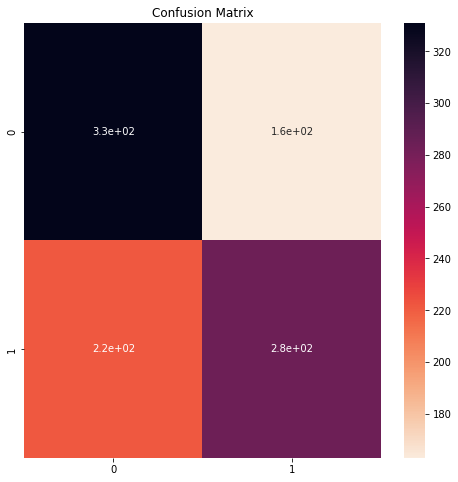

Classification Report


              precision    recall  f1-score   support

         cat       0.60      0.67      0.63       494
         dog       0.64      0.56      0.60       506

    accuracy                           0.61      1000
   macro avg       0.62      0.62      0.61      1000
weighted avg       0.62      0.61      0.61      1000



Model Accuracy


0.615


In [ ]:
# Implementation of SVM Algorithm
m2_SVM = SVM_Algoritham(X_train, X_test, Y_train, Y_test)

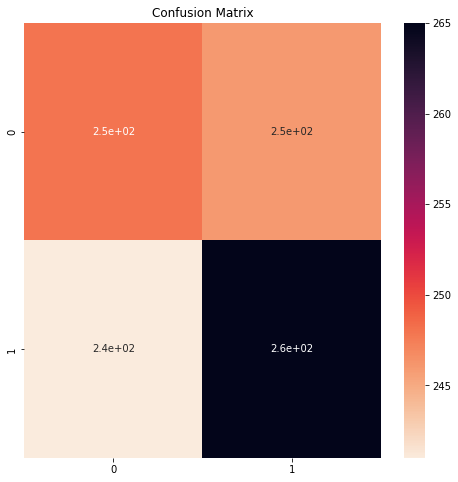

Classification Report


              precision    recall  f1-score   support

         cat       0.51      0.50      0.50       494
         dog       0.52      0.52      0.52       506

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000



Model Accuracy


0.513


In [ ]:
# Implementation of Decision Tree Algorithm
m2_DT = DT_Algoritham(X_train, X_test, Y_train, Y_test)

### Model 3

Applying Image Vectorisation, Canny Edge Detection and HOG in SVM & DT Algorithm

In [ ]:

# method to get image features
def M3_Features(images):
  features_list = []
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # feature extraction
    edges_canny = cv2.Canny(img_grayscaled, 100, 200) 
    edge_features = edges_canny.flatten()
    img_hist = cv2.equalizeHist(img_grayscaled)
    hog_features, hog_image = hog(img_hist, orientations=9, pixels_per_cell=(8, 8), 
                                  cells_per_block=(2, 2), visualize=True )
    features = np.hstack((edge_features, hog_features))
    features_list.append(features)

  features_list = np.array(features_list)
  return features_list
     

In [ ]:

# feature extraction
Features_Train_M3 = M3_Features(train_images)
print(Features_Train_M3.shape)

(10000, 60736)


In [ ]:
from sklearn.decomposition import PCA

for img in train_images:
    # image preprocessing
  img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


pca = PCA(n_components=2)
pca.fit(img_grayscaled)

X_new = pca.transform(img_grayscaled)


print(f'Shape of transformed data: {X_new.shape}')
print(f'Transformed data:\n {X_new}')

In [ ]:
# data split for train and validation
X_train, X_test, Y_train, Y_test = train_test_split(Features_Train_M3, df_train_CSV['label'], test_size=0.1, random_state=RANDOM_SEED)


In [ ]:
# Implementation of SVM Algorithm
m3_SVM = SVM_Algoritham(X_train, X_test, Y_train, Y_test)

In [ ]:
# Implementation of Decision Tree Algorithm
m3_DT = DT_Algoritham(X_train, X_test, Y_train, Y_test)

# Prediciton of Test dataset

In [ ]:
# Prediciton

df_test_CSV  = pd.read_csv('https://raw.githubusercontent.com/harishahamed26/Image-Recognition-Cat-Dog/main/test.csv')

print('\n')
print('Printing 5 rows of the test dataset ')
print('\n')
print(df_test_CSV.head(5))



Printing 5 rows of the test dataset 


   id
0   1
1   2
2   3
3   4
4   5


In [ ]:
# Loading of test images

test_images = LoadImage(df_test_CSV['id'], 'test_images' , Const_Dim)
print(f'Number of training images loaded: {len(test_images)}')


Number of training images loaded: 1000


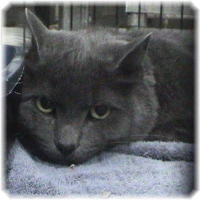

In [ ]:
# Displaying a sample of test image 

cv2_imshow(test_images[1])